### Chi-Square Test-

The Pearson’s Chi-Square statistical hypothesis is a test for independence between categorical variables. In this article, we will perform the test using a mathematical approach and then using Python’s SciPy module.
First, let us see the mathematical approach :

The Contingency Table :
A Contingency table (also called crosstab) is used in statistics to summarise the relationship between several categorical variables. 

Null hypothesis:
We start by defining the null hypothesis (H0) which states that there is no relation between the variables. An alternate hypothesis would state that there is a significant relation between the two.


In [10]:
sns.set(color_codes=True)

sns.set(rc={'figure.figsize':(5,5)})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import seaborn as sns

In [16]:
df=sns.load_dataset('tips')

In [17]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
data_table=pd.crosstab(df['sex'],df['smoker'])
print(data_table)

<IPython.core.display.Javascript object>

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [20]:
data_table.values

array([[60, 97],
       [33, 54]], dtype=int64)

In [21]:
#observed values
ob_val=data_table.values
print("Observed values:-\n",ob_val)

Observed values:-
 [[60 97]
 [33 54]]


In [29]:
import scipy.stats as stats

In [30]:
val=stats.chi2_contingency(data_table)

In [31]:
val

(0.008763290531773594,
 0.925417020494423,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [33]:
expected_val=val[3]
print(expected_val)

[[59.84016393 97.15983607]
 [33.15983607 53.84016393]]


In [35]:
no_of_rows=len(data_table.iloc[0:2,0])
no_of_columns=len(data_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


We prepare this table by calculating for each item the following:

frac{( Observed_value - Calculated_value)^2 }/{ Calculated\_value} 


In [38]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(ob_val,expected_val)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [39]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.001934818536627623


In [40]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [41]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


In [42]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [11]:
df=pd.read_csv("C:\\Users\\Pratik1\Desktop\dataset\\data's\\iris.csv")
df

<IPython.core.display.Javascript object>

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<IPython.core.display.Javascript object>

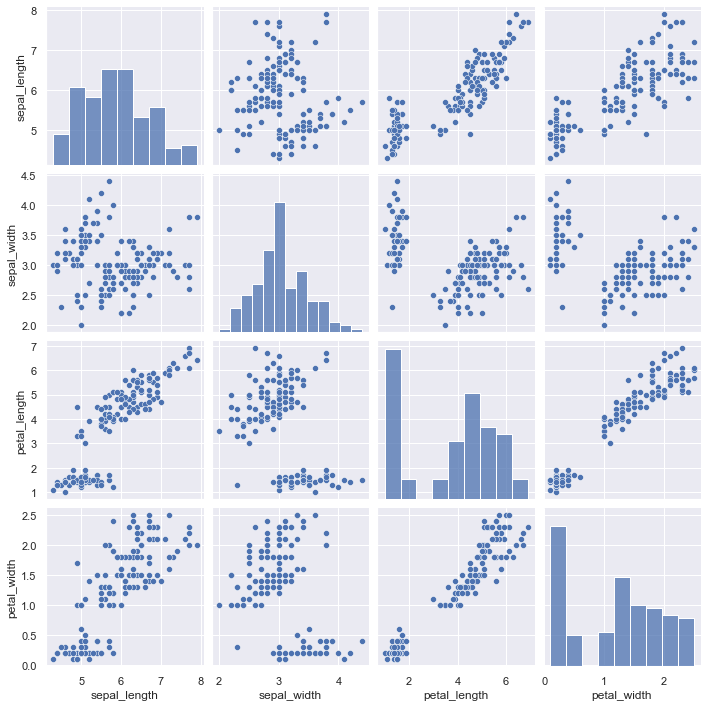

In [9]:
sns.pairplot(df)